### Import Libraries

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import scipy.stats as stats

!pip install plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

!pip install heatmapz
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot
from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

### Read the Covid Super Data

In [2]:
covid_merged_data = pd.read_csv('../data/covid_large.csv')

In [3]:
covid_merged_data.head()

State  countyFIPS            County Name        Date  Num of Cases  \
0    AL           0  statewide unallocated  2020-01-22             0   
1    AL           0  statewide unallocated  2020-01-23             0   
2    AL           0  statewide unallocated  2020-01-24             0   
3    AL           0  statewide unallocated  2020-01-25             0   
4    AL           0  statewide unallocated  2020-01-26             0   

   Num of Deaths  population  
0              0           0  
1              0           0  
2              0           0  
3              0           0  
4              0           0

### Task 1 Member task1: Generate weekly statistics (mean, median, mode) for number of cases and deaths across a North Carolina state.

In [4]:
#Filter all rows which are in the state of "North Carolina"
NC_data= covid_merged_data[covid_merged_data['State']=="NC"]
NC_data

State  countyFIPS            County Name        Date  Num of Cases  \
456225    NC           0  statewide unallocated  2020-01-22             0   
456226    NC           0  statewide unallocated  2020-01-23             0   
456227    NC           0  statewide unallocated  2020-01-24             0   
456228    NC           0  statewide unallocated  2020-01-25             0   
456229    NC           0  statewide unallocated  2020-01-26             0   
...      ...         ...                    ...         ...           ...   
480157    NC       37199          yancey county  2020-09-10           110   
480158    NC       37199          yancey county  2020-09-11           112   
480159    NC       37199          yancey county  2020-09-12           113   
480160    NC       37199          yancey county  2020-09-13           114   
480161    NC       37199          yancey county  2020-09-14           116   

        Num of Deaths  population  
456225              0           0  
456226              0           0  
456227              0           0  
456228              0           0  
456229              0           0  
...               ...         ...  
480157              0       18069  
480158              0       18069  
480159              0       18069  
480160              0       18069  
480161              0       18069  

[23937 rows x 7 columns]

In [5]:
#Calculate new cases and deaths for each day
NC_data['Num of Cases per day'] = NC_data['Num of Cases'].diff()
NC_data['Num of Death per day'] = NC_data['Num of Deaths'].diff()
NC_data

/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


State  countyFIPS            County Name        Date  Num of Cases  \
456225    NC           0  statewide unallocated  2020-01-22             0   
456226    NC           0  statewide unallocated  2020-01-23             0   
456227    NC           0  statewide unallocated  2020-01-24             0   
456228    NC           0  statewide unallocated  2020-01-25             0   
456229    NC           0  statewide unallocated  2020-01-26             0   
...      ...         ...                    ...         ...           ...   
480157    NC       37199          yancey county  2020-09-10           110   
480158    NC       37199          yancey county  2020-09-11           112   
480159    NC       37199          yancey county  2020-09-12           113   
480160    NC       37199          yancey county  2020-09-13           114   
480161    NC       37199          yancey county  2020-09-14           116   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  
456225              0           0                   NaN                   NaN  
456226              0           0                   0.0                   0.0  
456227              0           0                   0.0                   0.0  
456228              0           0                   0.0                   0.0  
456229              0           0                   0.0                   0.0  
...               ...         ...                   ...                   ...  
480157              0       18069                   2.0                   0.0  
480158              0       18069                   2.0                   0.0  
480159              0       18069                   1.0                   0.0  
480160              0       18069                   1.0                   0.0  
480161              0       18069                   2.0                   0.0  

[23937 rows x 9 columns]

In [6]:
#Drop the first date as we we are using .diff, we will get the first value as NAN 
NC_data= NC_data[NC_data['Date'] != '2020-01-22']
NC_data['Date'] = NC_data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))


/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
NC_data

State  countyFIPS            County Name       Date  Num of Cases  \
456226    NC           0  statewide unallocated 2020-01-23             0   
456227    NC           0  statewide unallocated 2020-01-24             0   
456228    NC           0  statewide unallocated 2020-01-25             0   
456229    NC           0  statewide unallocated 2020-01-26             0   
456230    NC           0  statewide unallocated 2020-01-27             0   
...      ...         ...                    ...        ...           ...   
480157    NC       37199          yancey county 2020-09-10           110   
480158    NC       37199          yancey county 2020-09-11           112   
480159    NC       37199          yancey county 2020-09-12           113   
480160    NC       37199          yancey county 2020-09-13           114   
480161    NC       37199          yancey county 2020-09-14           116   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  
456226              0           0                   0.0                   0.0  
456227              0           0                   0.0                   0.0  
456228              0           0                   0.0                   0.0  
456229              0           0                   0.0                   0.0  
456230              0           0                   0.0                   0.0  
...               ...         ...                   ...                   ...  
480157              0       18069                   2.0                   0.0  
480158              0       18069                   2.0                   0.0  
480159              0       18069                   1.0                   0.0  
480160              0       18069                   1.0                   0.0  
480161              0       18069                   2.0                   0.0  

[23836 rows x 9 columns]

### Get the total number of cases and deaths for each day 

In [8]:
NC_data_groupedBydate = NC_data.groupby("Date").sum().reset_index()
NC_data_groupedBydate

Date  countyFIPS  Num of Cases  Num of Deaths  population  \
0   2020-01-23     3710000             0              0    10488084   
1   2020-01-24     3710000             0              0    10488084   
2   2020-01-25     3710000             0              0    10488084   
3   2020-01-26     3710000             0              0    10488084   
4   2020-01-27     3710000             0              0    10488084   
..         ...         ...           ...            ...         ...   
231 2020-09-10     3710000        181917           2990    10488084   
232 2020-09-11     3710000        183449           3023    10488084   
233 2020-09-12     3710000        184902           3047    10488084   
234 2020-09-13     3710000        186095           3052    10488084   
235 2020-09-14     3710000        186936           3060    10488084   

     Num of Cases per day  Num of Death per day  
0                     0.0                   0.0  
1                     0.0                   0.0  
2                     0.0                   0.0  
3                     0.0                   0.0  
4                     0.0                   0.0  
..                    ...                   ...  
231                1225.0                  33.0  
232                1532.0                  33.0  
233                1453.0                  24.0  
234                1193.0                   5.0  
235                 841.0                   8.0  

[236 rows x 7 columns]

### Normalize the cases and deaths by population

In [9]:
NC_data_groupedBydate['Num of Cases per day normalized'] = (NC_data_groupedBydate['Num of Cases per day']/NC_data_groupedBydate['population'])*1000000
NC_data_groupedBydate['Num of Deaths per day normalized'] = (NC_data_groupedBydate['Num of Death per day']/NC_data_groupedBydate['population'])*1000000
NC_data_groupedBydate

Date  countyFIPS  Num of Cases  Num of Deaths  population  \
0   2020-01-23     3710000             0              0    10488084   
1   2020-01-24     3710000             0              0    10488084   
2   2020-01-25     3710000             0              0    10488084   
3   2020-01-26     3710000             0              0    10488084   
4   2020-01-27     3710000             0              0    10488084   
..         ...         ...           ...            ...         ...   
231 2020-09-10     3710000        181917           2990    10488084   
232 2020-09-11     3710000        183449           3023    10488084   
233 2020-09-12     3710000        184902           3047    10488084   
234 2020-09-13     3710000        186095           3052    10488084   
235 2020-09-14     3710000        186936           3060    10488084   

     Num of Cases per day  Num of Death per day  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     0.0                   0.0   
4                     0.0                   0.0   
..                    ...                   ...   
231                1225.0                  33.0   
232                1532.0                  33.0   
233                1453.0                  24.0   
234                1193.0                   5.0   
235                 841.0                   8.0   

     Num of Cases per day normalized  Num of Deaths per day normalized  
0                           0.000000                          0.000000  
1                           0.000000                          0.000000  
2                           0.000000                          0.000000  
3                           0.000000                          0.000000  
4                           0.000000                          0.000000  
..                               ...                               ...  
231                       116.799217                          3.146428  
232                       146.070531                          3.146428  
233                       138.538173                          2.288311  
234                       113.748136                          0.476731  
235                        80.186238                          0.762770  

[236 rows x 9 columns]

### Find the weekly normalized number of cases and deaths 

In [10]:
NC_weekly_data = NC_data_groupedBydate.groupby([ pd.Grouper(key='Date', freq='w')])['Num of Cases per day normalized','Num of Deaths per day normalized'].agg({'Num of Cases per day normalized':'mean',
                                                                                                'Num of Deaths per day normalized' :'mean'}).reset_index()
NC_weekly_data

Date  Num of Cases per day normalized  \
0  2020-01-26                         0.000000   
1  2020-02-02                         0.000000   
2  2020-02-09                         0.000000   
3  2020-02-16                         0.000000   
4  2020-02-23                         0.000000   
5  2020-03-01                         0.000000   
6  2020-03-08                         0.027242   
7  2020-03-15                         0.422248   
8  2020-03-22                         3.023840   
9  2020-03-29                        12.367777   
10 2020-04-05                        19.368920   
11 2020-04-12                        26.315579   
12 2020-04-19                        26.233853   
13 2020-04-26                        27.745773   
14 2020-05-03                        43.368945   
15 2020-05-10                        42.129444   
16 2020-05-17                        51.146479   
17 2020-05-24                        64.004609   
18 2020-05-31                        60.721972   
19 2020-06-07                       107.073895   
20 2020-06-14                       116.840080   
21 2020-06-21                       118.270274   
22 2020-06-28                       127.341794   
23 2020-07-05                       147.636935   
24 2020-07-12                       173.162501   
25 2020-07-19                       191.823134   
26 2020-07-26                       176.227204   
27 2020-08-02                       170.274870   
28 2020-08-09                       149.189717   
29 2020-08-16                       135.500713   
30 2020-08-23                       138.401964   
31 2020-08-30                       150.020592   
32 2020-09-06                       146.683472   
33 2020-09-13                       109.457552   
34 2020-09-20                        80.186238   

    Num of Deaths per day normalized  
0                           0.000000  
1                           0.000000  
2                           0.000000  
3                           0.000000  
4                           0.000000  
5                           0.000000  
6                           0.000000  
7                           0.000000  
8                           0.000000  
9                           0.054484  
10                          0.367764  
11                          0.667424  
12                          1.225881  
13                          1.743475  
14                          1.675371  
15                          1.688992  
16                          1.484678  
17                          1.144156  
18                          1.866063  
19                          1.566403  
20                          1.552783  
21                          1.498299  
22                          1.375711  
23                          1.103293  
24                          1.457436  
25                          1.784338  
26                          2.056756  
27                          2.479004  
28                          2.724180  
29                          2.438141  
30                          2.506246  
31                          2.206586  
32                          2.683317  
33                          2.220207  
34                          0.762770

### Claculate weekly statistics of NC

In [11]:
# Mean
NC_weekly_data.mean().round(decimals=0)

Num of Cases per day normalized     75.0
Num of Deaths per day normalized     1.0
dtype: float64

In [12]:
# Median
NC_weekly_data.median()

Num of Cases per day normalized     60.721972
Num of Deaths per day normalized     1.457436
dtype: float64

In [13]:
# Mode
NC_weekly_data[['Num of Cases per day normalized','Num of Deaths per day normalized']].mode()

Num of Cases per day normalized  Num of Deaths per day normalized
0                              0.0                               0.0

### Task1 Member task2 : Compare the data against other states.

### Filter the data for the states selected 
Selected states are 
* California
* Florida
* Texas
* New York
* Maryland

In [14]:
other_states_data= covid_merged_data[covid_merged_data["State"].isin(["CA","FL","TX","NY","MD","NC"])]
other_states_data

State  countyFIPS            County Name        Date  Num of Cases  \
45267     CA           0  statewide unallocated  2020-01-22             0   
45268     CA           0  statewide unallocated  2020-01-23             0   
45269     CA           0  statewide unallocated  2020-01-24             0   
45270     CA           0  statewide unallocated  2020-01-25             0   
45271     CA           0  statewide unallocated  2020-01-26             0   
...      ...         ...                    ...         ...           ...   
669046    TX       48507          zavala county  2020-09-10           274   
669047    TX       48507          zavala county  2020-09-11           275   
669048    TX       48507          zavala county  2020-09-12           282   
669049    TX       48507          zavala county  2020-09-13           282   
669050    TX       48507          zavala county  2020-09-14           282   

        Num of Deaths  population  
45267               0           0  
45268               0           0  
45269               0           0  
45270               0           0  
45271               0           0  
...               ...         ...  
669046             13       11840  
669047             14       11840  
669048             14       11840  
669049             14       11840  
669050             14       11840  

[135801 rows x 7 columns]

In [15]:
#Calculate new cases and deaths
other_states_data['Num of Cases per day'] = other_states_data['Num of Cases'].diff()
other_states_data['Num of Death per day'] = other_states_data['Num of Deaths'].diff()
other_states_data

/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


State  countyFIPS            County Name        Date  Num of Cases  \
45267     CA           0  statewide unallocated  2020-01-22             0   
45268     CA           0  statewide unallocated  2020-01-23             0   
45269     CA           0  statewide unallocated  2020-01-24             0   
45270     CA           0  statewide unallocated  2020-01-25             0   
45271     CA           0  statewide unallocated  2020-01-26             0   
...      ...         ...                    ...         ...           ...   
669046    TX       48507          zavala county  2020-09-10           274   
669047    TX       48507          zavala county  2020-09-11           275   
669048    TX       48507          zavala county  2020-09-12           282   
669049    TX       48507          zavala county  2020-09-13           282   
669050    TX       48507          zavala county  2020-09-14           282   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  
45267               0           0                   NaN                   NaN  
45268               0           0                   0.0                   0.0  
45269               0           0                   0.0                   0.0  
45270               0           0                   0.0                   0.0  
45271               0           0                   0.0                   0.0  
...               ...         ...                   ...                   ...  
669046             13       11840                   2.0                   0.0  
669047             14       11840                   1.0                   1.0  
669048             14       11840                   7.0                   0.0  
669049             14       11840                   0.0                   0.0  
669050             14       11840                   0.0                   0.0  

[135801 rows x 9 columns]

In [16]:
#Drop the first date as we are taking the difference
other_states_data= other_states_data[other_states_data['Date'] != '2020-01-22']
other_states_data['Date'] = other_states_data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
other_states_data

/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


State  countyFIPS            County Name       Date  Num of Cases  \
45268     CA           0  statewide unallocated 2020-01-23             0   
45269     CA           0  statewide unallocated 2020-01-24             0   
45270     CA           0  statewide unallocated 2020-01-25             0   
45271     CA           0  statewide unallocated 2020-01-26             0   
45272     CA           0  statewide unallocated 2020-01-27             0   
...      ...         ...                    ...        ...           ...   
669046    TX       48507          zavala county 2020-09-10           274   
669047    TX       48507          zavala county 2020-09-11           275   
669048    TX       48507          zavala county 2020-09-12           282   
669049    TX       48507          zavala county 2020-09-13           282   
669050    TX       48507          zavala county 2020-09-14           282   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  
45268               0           0                   0.0                   0.0  
45269               0           0                   0.0                   0.0  
45270               0           0                   0.0                   0.0  
45271               0           0                   0.0                   0.0  
45272               0           0                   0.0                   0.0  
...               ...         ...                   ...                   ...  
669046             13       11840                   2.0                   0.0  
669047             14       11840                   1.0                   1.0  
669048             14       11840                   7.0                   0.0  
669049             14       11840                   0.0                   0.0  
669050             14       11840                   0.0                   0.0  

[135228 rows x 9 columns]

### Calculate the total number of normalized number of cases and deaths in each state for all the days

In [17]:
# Groupby date and State
other_states_data_groupedByDate = other_states_data.groupby(["State","Date"]).sum().reset_index()
other_states_data_groupedByDate

State       Date  countyFIPS  Num of Cases  Num of Deaths  population  \
0       CA 2020-01-23      357364             0              0    39512223   
1       CA 2020-01-24      357364             0              0    39512223   
2       CA 2020-01-25      357364             0              0    39512223   
3       CA 2020-01-26      357364             2              0    39512223   
4       CA 2020-01-27      357364             3              0    39512223   
...    ...        ...         ...           ...            ...         ...   
1411    TX 2020-09-10    12256516        658585          13847    28995881   
1412    TX 2020-09-11    12256516        662078          13991    28995881   
1413    TX 2020-09-12    12256516        666509          14138    28995881   
1414    TX 2020-09-13    12256516        670011          14185    28995881   
1415    TX 2020-09-14    12256516        672579          14206    28995881   

      Num of Cases per day  Num of Death per day  
0                      0.0                   0.0  
1                      0.0                   0.0  
2                      0.0                   0.0  
3                      2.0                   0.0  
4                      1.0                   0.0  
...                    ...                   ...  
1411                4017.0                 161.0  
1412                3493.0                 144.0  
1413                4431.0                 147.0  
1414                3502.0                  47.0  
1415                2568.0                  21.0  

[1416 rows x 8 columns]

In [18]:
#Normalize the cases by population(per 1000000)
other_states_data_groupedByDate['Num of Cases per day normalized'] = (other_states_data_groupedByDate['Num of Cases per day']/other_states_data_groupedByDate['population'])*1000000
other_states_data_groupedByDate['Num of Deaths per day normalized'] = (other_states_data_groupedByDate['Num of Death per day']/other_states_data_groupedByDate['population'])*1000000
other_states_data_groupedByDate

State       Date  countyFIPS  Num of Cases  Num of Deaths  population  \
0       CA 2020-01-23      357364             0              0    39512223   
1       CA 2020-01-24      357364             0              0    39512223   
2       CA 2020-01-25      357364             0              0    39512223   
3       CA 2020-01-26      357364             2              0    39512223   
4       CA 2020-01-27      357364             3              0    39512223   
...    ...        ...         ...           ...            ...         ...   
1411    TX 2020-09-10    12256516        658585          13847    28995881   
1412    TX 2020-09-11    12256516        662078          13991    28995881   
1413    TX 2020-09-12    12256516        666509          14138    28995881   
1414    TX 2020-09-13    12256516        670011          14185    28995881   
1415    TX 2020-09-14    12256516        672579          14206    28995881   

      Num of Cases per day  Num of Death per day  \
0                      0.0                   0.0   
1                      0.0                   0.0   
2                      0.0                   0.0   
3                      2.0                   0.0   
4                      1.0                   0.0   
...                    ...                   ...   
1411                4017.0                 161.0   
1412                3493.0                 144.0   
1413                4431.0                 147.0   
1414                3502.0                  47.0   
1415                2568.0                  21.0   

      Num of Cases per day normalized  Num of Deaths per day normalized  
0                            0.000000                          0.000000  
1                            0.000000                          0.000000  
2                            0.000000                          0.000000  
3                            0.050617                          0.000000  
4                            0.025309                          0.000000  
...                               ...                               ...  
1411                       138.536918                          5.552513  
1412                       120.465386                          4.966223  
1413                       152.814808                          5.069686  
1414                       120.775775                          1.620920  
1415                        88.564303                          0.724241  

[1416 rows x 10 columns]

### Calculate the weekly number of cases and deaths for each state

In [19]:
other_states_weekly_data = other_states_data_groupedByDate.groupby(["State", pd.Grouper(key='Date', freq='w')])['Num of Cases per day normalized','Num of Deaths per day normalized'].agg({'Num of Cases per day normalized':'mean',
                                                                                                'Num of Deaths per day normalized' :'mean'}).reset_index()
other_states_weekly_data

State       Date  Num of Cases per day normalized  \
0      CA 2020-01-26                         0.012654   
1      CA 2020-02-02                         0.007231   
2      CA 2020-02-09                         0.007231   
3      CA 2020-02-16                         0.007231   
4      CA 2020-02-23                         0.014462   
..    ...        ...                              ...   
205    TX 2020-08-23                       210.901877   
206    TX 2020-08-30                       159.308342   
207    TX 2020-09-06                       140.768762   
208    TX 2020-09-13                       114.996629   
209    TX 2020-09-20                        88.564303   

     Num of Deaths per day normalized  
0                            0.000000  
1                            0.000000  
2                            0.003616  
3                            0.000000  
4                            0.003616  
..                                ...  
205                          6.887678  
206                          5.616561  
207                          4.729736  
208                          3.542375  
209                          0.724241  

[210 rows x 4 columns]

### Calculate the weekly mean and median of the number of cases 

In [20]:
other_states_weekly_data_cases_stats=other_states_weekly_data.groupby('State')['Num of Cases per day normalized'].agg(['mean','median']).reset_index()
other_states_weekly_data_cases_stats

State        mean     median
0    CA   82.163828  51.607900
1    FL  128.498317  49.233705
2    MD   80.590519  88.114866
3    NC   74.713360  60.721972
4    NY   94.104800  34.132568
5    TX   96.845142  43.577618

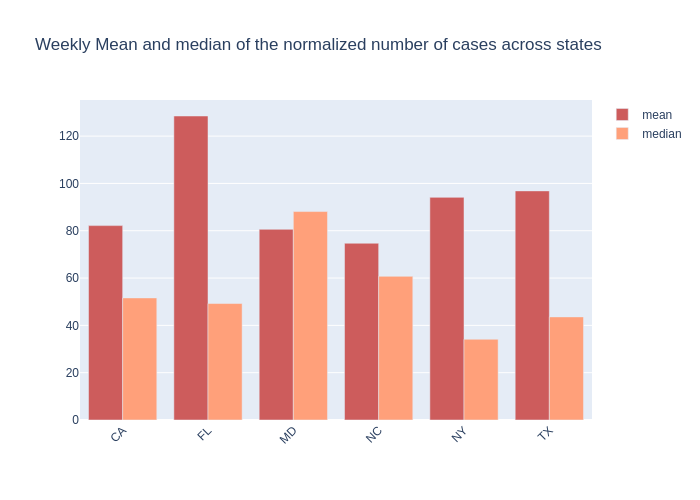

In [21]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=other_states_weekly_data_cases_stats['State'],
    y=other_states_weekly_data_cases_stats['mean'],
    name='mean',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=other_states_weekly_data_cases_stats['State'],
    y=other_states_weekly_data_cases_stats['median'],
    name='median',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
    title="Weekly Mean and median of the normalized number of cases across states")

fig.write_image("../images/nc_meanCases.png")
Image(filename="../images/nc_meanCases.png")
#fig.show()


### Comparison
- From the above figure we obseve that the Weekly mean number of cases for Florida is the highest and the weekly mean number of cases for NC is the lowest among the 6 states.
- Weekly Median number of cases is the highest for Maryland and lowest for New York

### Calculate the weekly mean and median of the number of deaths 

In [22]:
other_states_weekly_data_deaths_stats=other_states_weekly_data.groupby('State')['Num of Deaths per day normalized'].agg(['mean','median']).reset_index()
other_states_weekly_data_deaths_stats

State      mean    median
0    CA  1.545272  1.666754
1    FL  2.443346  1.689457
2    MD  2.635716  1.488666
3    NC  1.209536  1.457436
4    NY  6.878338  0.873876
5    TX  2.017458  0.867118

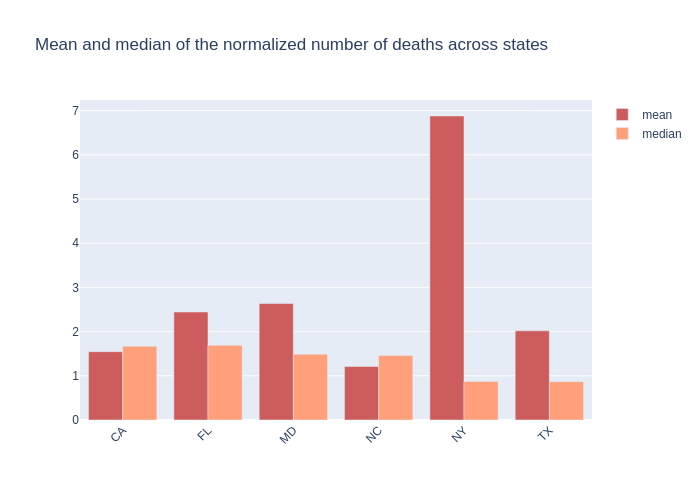

In [23]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=other_states_weekly_data_deaths_stats['State'],
    y=other_states_weekly_data_deaths_stats['mean'],
    name='mean',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=other_states_weekly_data_deaths_stats['State'],
    y=other_states_weekly_data_deaths_stats['median'],
    name='median',
    marker_color='lightsalmon'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45,
    title="Mean and median of the normalized number of deaths across states")

fig.write_image("../images/nc_meanDeaths.png")
Image(filename="../images/nc_meanDeaths.png")
#fig.show()

### Comparison
- From the above figure we obseve that the Weekly mean number of cases for New York is the highest and the weekly mean number of cases for NC is the lowest among the 6 states.
- Weekly Median number of cases is the highest for Florida and lowest for New York

### Task 1 Member task 3 Identify counties with high case and death rates.


- Take the NC data
- Groupby counties and calculate the sum(total) number of cases per day and number of deaths cases per day
- normalize the total number of cases and deaths of each county by dividing it by total population and multiply by 1000
- sort the values in descending order
- list the top 10 counties for highest number of cases
- list the top 10 counties for highest number of deaths

In [24]:
# Remove the rows that conatin county name as "statewide unallocated"
NC_data= NC_data[NC_data['County Name'] != 'statewide unallocated']
NC_data

State  countyFIPS      County Name       Date  Num of Cases  \
456463    NC       37001  alamance county 2020-01-23             0   
456464    NC       37001  alamance county 2020-01-24             0   
456465    NC       37001  alamance county 2020-01-25             0   
456466    NC       37001  alamance county 2020-01-26             0   
456467    NC       37001  alamance county 2020-01-27             0   
...      ...         ...              ...        ...           ...   
480157    NC       37199    yancey county 2020-09-10           110   
480158    NC       37199    yancey county 2020-09-11           112   
480159    NC       37199    yancey county 2020-09-12           113   
480160    NC       37199    yancey county 2020-09-13           114   
480161    NC       37199    yancey county 2020-09-14           116   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  
456463              0      169509                   0.0                   0.0  
456464              0      169509                   0.0                   0.0  
456465              0      169509                   0.0                   0.0  
456466              0      169509                   0.0                   0.0  
456467              0      169509                   0.0                   0.0  
...               ...         ...                   ...                   ...  
480157              0       18069                   2.0                   0.0  
480158              0       18069                   2.0                   0.0  
480159              0       18069                   1.0                   0.0  
480160              0       18069                   1.0                   0.0  
480161              0       18069                   2.0                   0.0  

[23600 rows x 9 columns]

In [25]:
#Groupby counties and calculate the sum(total) number of cases per day and number of deaths cases per day
NC_county_data = NC_data.groupby(['countyFIPS','County Name','population'])[['Num of Cases per day','Num of Death per day']].agg('sum').reset_index()
NC_county_data

countyFIPS       County Name  population  Num of Cases per day  \
0        37001   alamance county      169509                3573.0   
1        37003  alexander county       37497                 471.0   
2        37005  alleghany county       11137                 217.0   
3        37007      anson county       24446                 510.0   
4        37009       ashe county       27203                 241.0   
..         ...               ...         ...                   ...   
95       37191      wayne county      123131                3032.0   
96       37193     wilkes county       68412                1117.0   
97       37195     wilson county       81801                1968.0   
98       37197     yadkin county       37667                 687.0   
99       37199     yancey county       18069                 116.0   

    Num of Death per day  
0                   48.0  
1                    3.0  
2                    0.0  
3                    3.0  
4                    1.0  
..                   ...  
95                  62.0  
96                  28.0  
97                  44.0  
98                   7.0  
99                   0.0  

[100 rows x 5 columns]

In [26]:
#normalize the total number of cases and deaths of each county by dividing it by total population and multiply by 1000
NC_county_data['Num of Cases per day normalized'] = (NC_county_data['Num of Cases per day']/NC_county_data['population'])*1000
NC_county_data['Num of Deaths per day normalized'] = (NC_county_data['Num of Death per day']/NC_county_data['population'])*1000
NC_county_data

countyFIPS       County Name  population  Num of Cases per day  \
0        37001   alamance county      169509                3573.0   
1        37003  alexander county       37497                 471.0   
2        37005  alleghany county       11137                 217.0   
3        37007      anson county       24446                 510.0   
4        37009       ashe county       27203                 241.0   
..         ...               ...         ...                   ...   
95       37191      wayne county      123131                3032.0   
96       37193     wilkes county       68412                1117.0   
97       37195     wilson county       81801                1968.0   
98       37197     yadkin county       37667                 687.0   
99       37199     yancey county       18069                 116.0   

    Num of Death per day  Num of Cases per day normalized  \
0                   48.0                        21.078527   
1                    3.0                        12.561005   
2                    0.0                        19.484601   
3                    3.0                        20.862309   
4                    1.0                         8.859317   
..                   ...                              ...   
95                  62.0                        24.624181   
96                  28.0                        16.327545   
97                  44.0                        24.058386   
98                   7.0                        18.238777   
99                   0.0                         6.419835   

    Num of Deaths per day normalized  
0                           0.283171  
1                           0.080006  
2                           0.000000  
3                           0.122719  
4                           0.036761  
..                               ...  
95                          0.503529  
96                          0.409285  
97                          0.537891  
98                          0.185839  
99                          0.000000  

[100 rows x 7 columns]

In [27]:
#Top 5 Counties with high cases rate
NC_county_data.sort_values(by=['Num of Cases per day normalized'],ascending=False).head(5)

countyFIPS        County Name  population  Num of Cases per day  \
61       37123  montgomery county       27173                 986.0   
30       37061      duplin county       58741                2121.0   
77       37155     robeson county      130625                4050.0   
88       37177     tyrrell county        4016                 110.0   
83       37167      stanly county       62806                1720.0   

    Num of Death per day  Num of Cases per day normalized  \
61                  23.0                        36.286019   
30                  52.0                        36.107659   
77                  66.0                        31.004785   
88                   2.0                        27.390438   
83                  52.0                        27.385919   

    Num of Deaths per day normalized  
61                          0.846428  
30                          0.885242  
77                          0.505263  
88                          0.498008  
83                          0.827946

In [28]:
#Top 5 Counties with high death rate
NC_county_data.sort_values(by=['Num of Deaths per day normalized'],ascending=False).head(5)

countyFIPS      County Name  population  Num of Cases per day  \
51       37103     jones county        9419                 141.0   
45       37091  hertford county       23677                 641.0   
90       37181     vance county       44535                 987.0   
23       37047  columbus county       55508                1260.0   
30       37061    duplin county       58741                2121.0   

    Num of Death per day  Num of Cases per day normalized  \
51                  11.0                        14.969742   
45                  24.0                        27.072687   
90                  43.0                        22.162344   
23                  52.0                        22.699431   
30                  52.0                        36.107659   

    Num of Deaths per day normalized  
51                          1.167852  
45                          1.013642  
90                          0.965533  
23                          0.936802  
30                          0.885242

#### Based on the normalized number of cases per day top 5 infected counties are 
- montgomery county
- duplin county	
- robeson county
- tyrrell county
- stanly county	

### Task 1 member task 4 : Plot daily trends (cases and deaths, new cases) of state 

In [29]:
#Display NC data
NC_data_groupedBydate

Date  countyFIPS  Num of Cases  Num of Deaths  population  \
0   2020-01-23     3710000             0              0    10488084   
1   2020-01-24     3710000             0              0    10488084   
2   2020-01-25     3710000             0              0    10488084   
3   2020-01-26     3710000             0              0    10488084   
4   2020-01-27     3710000             0              0    10488084   
..         ...         ...           ...            ...         ...   
231 2020-09-10     3710000        181917           2990    10488084   
232 2020-09-11     3710000        183449           3023    10488084   
233 2020-09-12     3710000        184902           3047    10488084   
234 2020-09-13     3710000        186095           3052    10488084   
235 2020-09-14     3710000        186936           3060    10488084   

     Num of Cases per day  Num of Death per day  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     0.0                   0.0   
4                     0.0                   0.0   
..                    ...                   ...   
231                1225.0                  33.0   
232                1532.0                  33.0   
233                1453.0                  24.0   
234                1193.0                   5.0   
235                 841.0                   8.0   

     Num of Cases per day normalized  Num of Deaths per day normalized  
0                           0.000000                          0.000000  
1                           0.000000                          0.000000  
2                           0.000000                          0.000000  
3                           0.000000                          0.000000  
4                           0.000000                          0.000000  
..                               ...                               ...  
231                       116.799217                          3.146428  
232                       146.070531                          3.146428  
233                       138.538173                          2.288311  
234                       113.748136                          0.476731  
235                        80.186238                          0.762770  

[236 rows x 9 columns]

In [30]:
# Calculate the log normalized values fro cases and deaths
NC_data_groupedBydate['Log normalized number of cases'] = np.log(NC_data_groupedBydate['Num of Cases per day normalized'])
NC_data_groupedBydate['Log normalized number of deaths'] = np.log(NC_data_groupedBydate['Num of Deaths per day normalized'])

NC_data_groupedBydate

/home/rashmi/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning:

divide by zero encountered in log



Date  countyFIPS  Num of Cases  Num of Deaths  population  \
0   2020-01-23     3710000             0              0    10488084   
1   2020-01-24     3710000             0              0    10488084   
2   2020-01-25     3710000             0              0    10488084   
3   2020-01-26     3710000             0              0    10488084   
4   2020-01-27     3710000             0              0    10488084   
..         ...         ...           ...            ...         ...   
231 2020-09-10     3710000        181917           2990    10488084   
232 2020-09-11     3710000        183449           3023    10488084   
233 2020-09-12     3710000        184902           3047    10488084   
234 2020-09-13     3710000        186095           3052    10488084   
235 2020-09-14     3710000        186936           3060    10488084   

     Num of Cases per day  Num of Death per day  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     0.0                   0.0   
4                     0.0                   0.0   
..                    ...                   ...   
231                1225.0                  33.0   
232                1532.0                  33.0   
233                1453.0                  24.0   
234                1193.0                   5.0   
235                 841.0                   8.0   

     Num of Cases per day normalized  Num of Deaths per day normalized  \
0                           0.000000                          0.000000   
1                           0.000000                          0.000000   
2                           0.000000                          0.000000   
3                           0.000000                          0.000000   
4                           0.000000                          0.000000   
..                               ...                               ...   
231                       116.799217                          3.146428   
232                       146.070531                          3.146428   
233                       138.538173                          2.288311   
234                       113.748136                          0.476731   
235                        80.186238                          0.762770   

     Log normalized number of cases  Log normalized number of deaths  
0                              -inf                             -inf  
1                              -inf                             -inf  
2                              -inf                             -inf  
3                              -inf                             -inf  
4                              -inf                             -inf  
..                              ...                              ...  
231                        4.760456                         1.146268  
232                        4.984090                         1.146268  
233                        4.931146                         0.827814  
234                        4.733987                        -0.740802  
235                        4.384352                        -0.270798  

[236 rows x 11 columns]

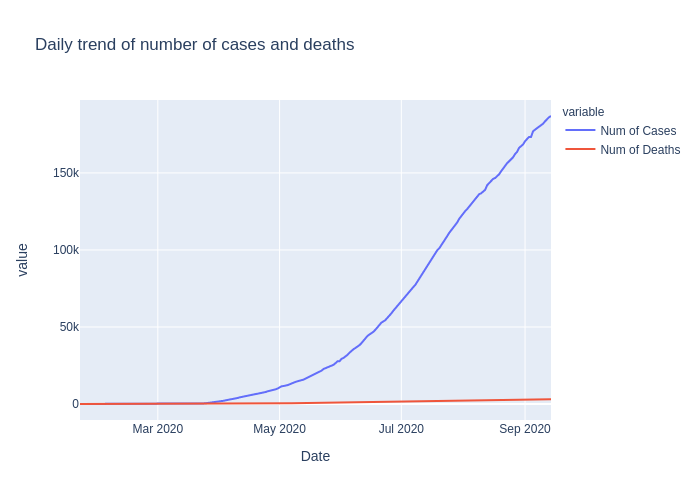

In [31]:
# Plot Daily trend of number of cases and deaths
NC_data_raw= covid_merged_data[covid_merged_data['State']=="NC"]
NC_data_raw_groupedBydate = NC_data_raw.groupby("Date").sum().reset_index()
fig = px.line(NC_data_raw_groupedBydate, x="Date", y=["Num of Cases","Num of Deaths"],title="Daily trend of number of cases and deaths ")

fig.write_image("../images/nc_dailyCases.png")
Image(filename="../images/nc_dailyCases.png")
#fig.show()

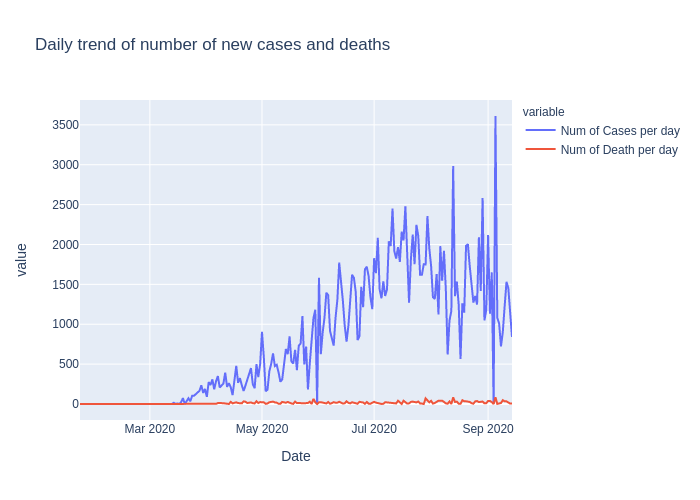

In [32]:
#Daily trend of new number of new cases and deaths
fig = px.line(NC_data_groupedBydate, x="Date", y=["Num of Cases per day","Num of Death per day"],title="Daily trend of number of new cases and deaths")
fig.write_image("../images/nc_dailyNewCases.png")
Image(filename="../images/nc_dailyNewCases.png")
#fig.show()

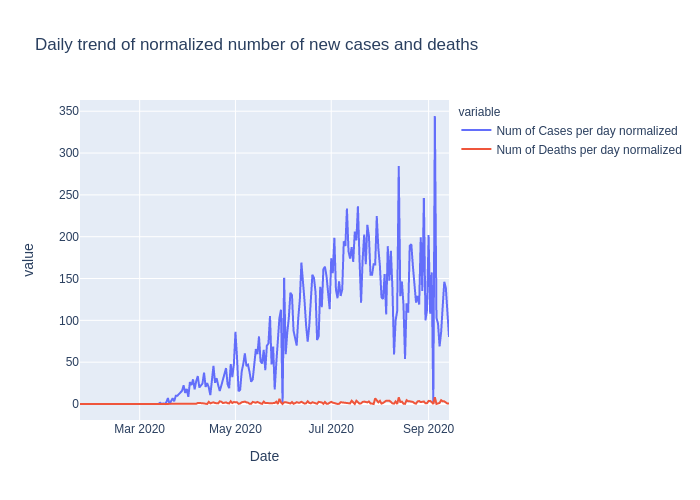

In [33]:
#Daily trend of normalized number of new cases and deaths
fig = px.line(NC_data_groupedBydate, x="Date", y=["Num of Cases per day normalized","Num of Deaths per day normalized"],title="Daily trend of normalized number of new cases and deaths")
fig.write_image("../images/nc_dailyNewNormalizedCases.png")
Image(filename="../images/nc_dailyNewNormalizedCases.png")
#fig.show()

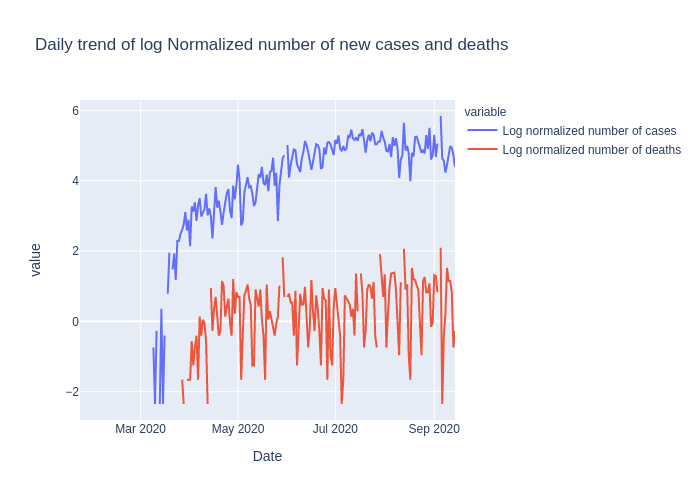

In [34]:
# Daily trend of log Normalized number of new cases and deaths
fig = px.line(NC_data_groupedBydate, x="Date", y=["Log normalized number of cases","Log normalized number of deaths"],title="Daily trend of log Normalized number of new cases and deaths")
fig.write_image("../images/nc_dailyNewLogNormalizedCases.png")
Image(filename="../images/nc_dailyNewLogNormalizedCases.png")
#fig.show()

### Filter the data of the Top 5 counties

In [35]:
top5_county_data = NC_data[NC_data["County Name"].isin(["montgomery county","duplin county","robeson county","tyrrell county","stanly county"])]
top5_county_data

State  countyFIPS     County Name       Date  Num of Cases  \
463573    NC       37061   duplin county 2020-01-23             0   
463574    NC       37061   duplin county 2020-01-24             0   
463575    NC       37061   duplin county 2020-01-25             0   
463576    NC       37061   duplin county 2020-01-26             0   
463577    NC       37061   duplin county 2020-01-27             0   
...      ...         ...             ...        ...           ...   
477550    NC       37177  tyrrell county 2020-09-10           108   
477551    NC       37177  tyrrell county 2020-09-11           108   
477552    NC       37177  tyrrell county 2020-09-12           110   
477553    NC       37177  tyrrell county 2020-09-13           110   
477554    NC       37177  tyrrell county 2020-09-14           110   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  
463573              0       58741                   0.0                   0.0  
463574              0       58741                   0.0                   0.0  
463575              0       58741                   0.0                   0.0  
463576              0       58741                   0.0                   0.0  
463577              0       58741                   0.0                   0.0  
...               ...         ...                   ...                   ...  
477550              2        4016                   0.0                   0.0  
477551              2        4016                   0.0                   0.0  
477552              2        4016                   2.0                   0.0  
477553              2        4016                   0.0                   0.0  
477554              2        4016                   0.0                   0.0  

[1180 rows x 9 columns]

In [36]:
# Calculate the normalized and log normalized number of cases and deaths
top5_county_data['Normalized num of cases']= (top5_county_data['Num of Cases per day']/top5_county_data['population'])*1000
top5_county_data['Normalized num of deaths']= (top5_county_data['Num of Death per day']/top5_county_data['population'])*1000
top5_county_data['Log normalized num of cases']= np.log(top5_county_data['Normalized num of cases'])
top5_county_data['Log normalized num of deaths']= np.log(top5_county_data['Normalized num of deaths'])
top5_county_data

/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

State  countyFIPS     County Name       Date  Num of Cases  \
463573    NC       37061   duplin county 2020-01-23             0   
463574    NC       37061   duplin county 2020-01-24             0   
463575    NC       37061   duplin county 2020-01-25             0   
463576    NC       37061   duplin county 2020-01-26             0   
463577    NC       37061   duplin county 2020-01-27             0   
...      ...         ...             ...        ...           ...   
477550    NC       37177  tyrrell county 2020-09-10           108   
477551    NC       37177  tyrrell county 2020-09-11           108   
477552    NC       37177  tyrrell county 2020-09-12           110   
477553    NC       37177  tyrrell county 2020-09-13           110   
477554    NC       37177  tyrrell county 2020-09-14           110   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  \
463573              0       58741                   0.0                   0.0   
463574              0       58741                   0.0                   0.0   
463575              0       58741                   0.0                   0.0   
463576              0       58741                   0.0                   0.0   
463577              0       58741                   0.0                   0.0   
...               ...         ...                   ...                   ...   
477550              2        4016                   0.0                   0.0   
477551              2        4016                   0.0                   0.0   
477552              2        4016                   2.0                   0.0   
477553              2        4016                   0.0                   0.0   
477554              2        4016                   0.0                   0.0   

        Normalized num of cases  Normalized num of deaths  \
463573                 0.000000                       0.0   
463574                 0.000000                       0.0   
463575                 0.000000                       0.0   
463576                 0.000000                       0.0   
463577                 0.000000                       0.0   
...                         ...                       ...   
477550                 0.000000                       0.0   
477551                 0.000000                       0.0   
477552                 0.498008                       0.0   
477553                 0.000000                       0.0   
477554                 0.000000                       0.0   

        Log normalized num of cases  Log normalized num of deaths  
463573                         -inf                          -inf  
463574                         -inf                          -inf  
463575                         -inf                          -inf  
463576                         -inf                          -inf  
463577                         -inf                          -inf  
...                             ...                           ...  
477550                         -inf                          -inf  
477551                         -inf                          -inf  
477552                    -0.697139                          -inf  
477553                         -inf                          -inf  
477554                         -inf                          -inf  

[1180 rows x 13 columns]

### Daily trend of number of cases and deaths of top 5 infected counties

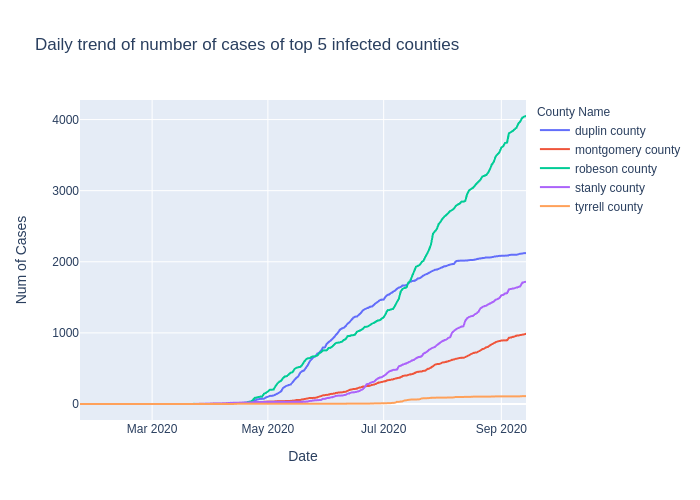

In [37]:
#Daily trend of number of cases and deaths of top 5 infected counties
fig = px.line(top5_county_data, x="Date", y="Num of Cases",color="County Name",title="Daily trend of number of cases of top 5 infected counties ")
fig.write_image("../images/nc_CountyCases.png")
Image(filename="../images/nc_CountyCases.png")
#fig.show()

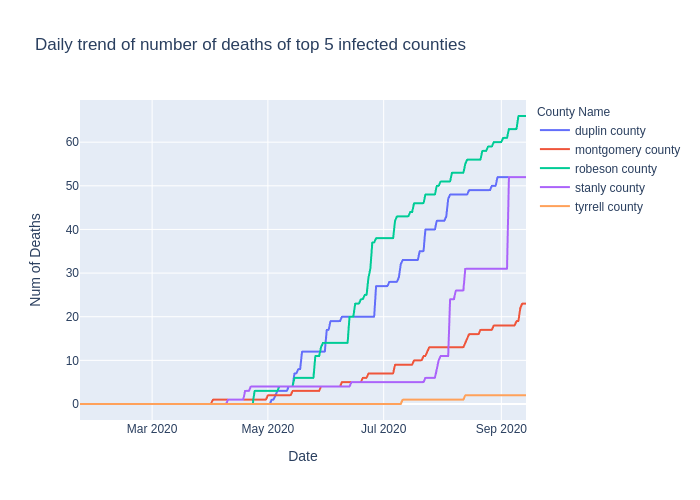

In [38]:
fig = px.line(top5_county_data, x="Date", y="Num of Deaths",color="County Name",title="Daily trend of number of deaths of top 5 infected counties ")
fig.write_image("../images/nc_CountyDeaths.png")
Image(filename="../images/nc_CountyDeaths.png")
#fig.show()

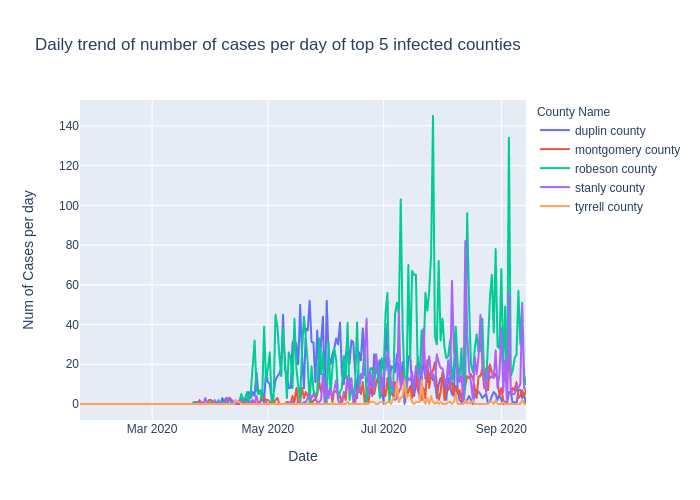

In [39]:
#Daily trend of number of cases per day and deaths per day of top 5 infected counties
fig = px.line(top5_county_data, x="Date", y="Num of Cases per day",color="County Name",title="Daily trend of number of cases per day of top 5 infected counties ")
fig.write_image("../images/nc_CountyNewCases.png")
Image(filename="../images/nc_CountyNewCases.png")
#fig.show()

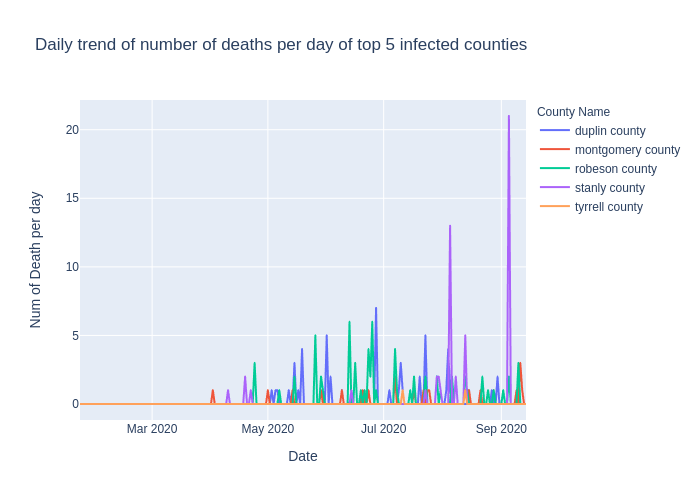

In [40]:
fig = px.line(top5_county_data, x="Date", y="Num of Death per day",color="County Name",title="Daily trend of number of deaths per day of top 5 infected counties ")
fig.write_image("../images/nc_CountyNewDeaths.png")
Image(filename="../images/nc_CountyNewDeaths.png")
#fig.show()

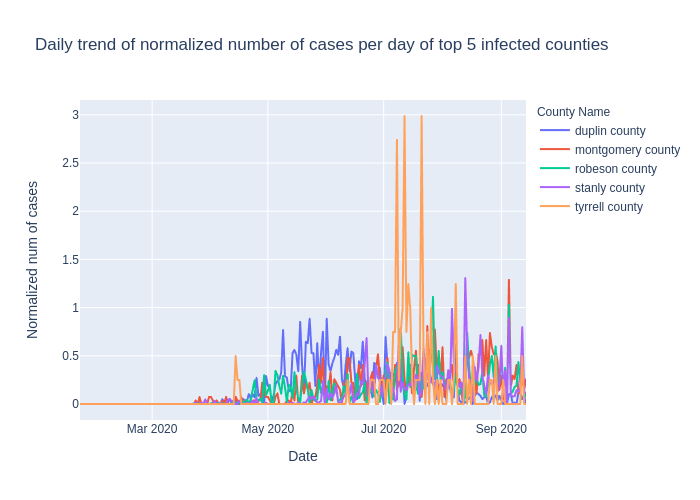

In [41]:
#Daily trend of normalized number of cases and deaths per day of top 5 infected counties
fig = px.line(top5_county_data, x="Date", y="Normalized num of cases",color="County Name",title="Daily trend of normalized number of cases per day of top 5 infected counties ")
fig.write_image("../images/nc_CountyNormalizedNewCases.png")
Image(filename="../images/nc_CountyNormalizedNewCases.png")
#fig.show()


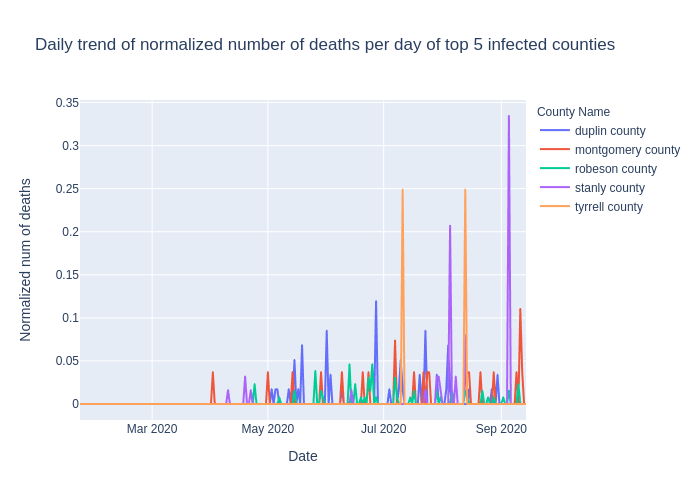

In [42]:
fig = px.line(top5_county_data, x="Date", y="Normalized num of deaths",color="County Name",title="Daily trend of normalized number of deaths per day of top 5 infected counties ")
fig.write_image("../images/nc_CountyNormalizedNewDeaths.png")
Image(filename="../images/nc_CountyNormalizedNewDeaths.png")
#fig.show()

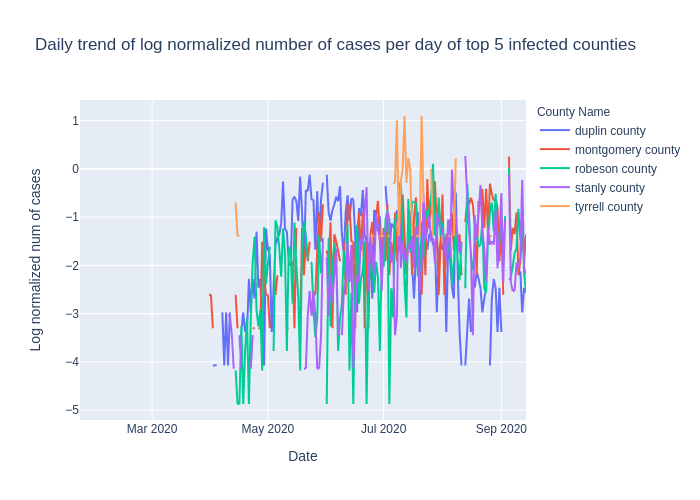

In [43]:
#Daily trend of number of cases and deaths of top 5 infected counties
fig = px.line(top5_county_data, x="Date", y="Log normalized num of cases",color="County Name",title="Daily trend of log normalized number of cases per day of top 5 infected counties ")
fig.write_image("../images/nc_CountyLogNormalizedNewCases.png")
Image(filename="../images/nc_CountyLogNormalizedNewCases.png")
#fig.show()


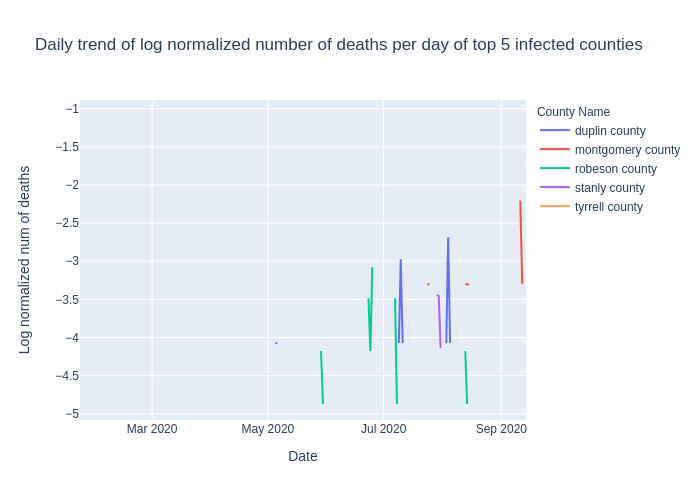

In [44]:
fig = px.line(top5_county_data, x="Date", y="Log normalized num of deaths",color="County Name",title="Daily trend of log normalized number of deaths per day of top 5 infected counties ")
fig.write_image("../images/nc_CountyLogNormalizedNewDeaths.png")
Image(filename="../images/nc_CountyLogNormalizedNewDeaths.png")
#fig.show()

## Task 2

### Plot the dailly normalized total number of cases per day of North Carolina in histogram

In [45]:
NC_mean = NC_data_groupedBydate['Num of Cases per day normalized'].mean()
NC_mean

75.52396557038008

In [46]:
NC_data_groupedBydate['NC PMF'] = stats.poisson.pmf(k=NC_data_groupedBydate['Num of Cases per day normalized'].round(decimals=0), mu=NC_mean)
NC_data_groupedBydate
#stats.poisson.pmf(k=60, mu=NC_mean)

Date  countyFIPS  Num of Cases  Num of Deaths  population  \
0   2020-01-23     3710000             0              0    10488084   
1   2020-01-24     3710000             0              0    10488084   
2   2020-01-25     3710000             0              0    10488084   
3   2020-01-26     3710000             0              0    10488084   
4   2020-01-27     3710000             0              0    10488084   
..         ...         ...           ...            ...         ...   
231 2020-09-10     3710000        181917           2990    10488084   
232 2020-09-11     3710000        183449           3023    10488084   
233 2020-09-12     3710000        184902           3047    10488084   
234 2020-09-13     3710000        186095           3052    10488084   
235 2020-09-14     3710000        186936           3060    10488084   

     Num of Cases per day  Num of Death per day  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     0.0                   0.0   
4                     0.0                   0.0   
..                    ...                   ...   
231                1225.0                  33.0   
232                1532.0                  33.0   
233                1453.0                  24.0   
234                1193.0                   5.0   
235                 841.0                   8.0   

     Num of Cases per day normalized  Num of Deaths per day normalized  \
0                           0.000000                          0.000000   
1                           0.000000                          0.000000   
2                           0.000000                          0.000000   
3                           0.000000                          0.000000   
4                           0.000000                          0.000000   
..                               ...                               ...   
231                       116.799217                          3.146428   
232                       146.070531                          3.146428   
233                       138.538173                          2.288311   
234                       113.748136                          0.476731   
235                        80.186238                          0.762770   

     Log normalized number of cases  Log normalized number of deaths  \
0                              -inf                             -inf   
1                              -inf                             -inf   
2                              -inf                             -inf   
3                              -inf                             -inf   
4                              -inf                             -inf   
..                              ...                              ...   
231                        4.760456                         1.146268   
232                        4.984090                         1.146268   
233                        4.931146                         0.827814   
234                        4.733987                        -0.740802   
235                        4.384352                        -0.270798   

           NC PMF  
0    1.586202e-33  
1    1.586202e-33  
2    1.586202e-33  
3    1.586202e-33  
4    1.586202e-33  
..            ...  
231  2.175178e-06  
232  2.141413e-13  
233  1.867075e-11  
234  7.881014e-06  
235  3.912133e-02  

[236 rows x 12 columns]

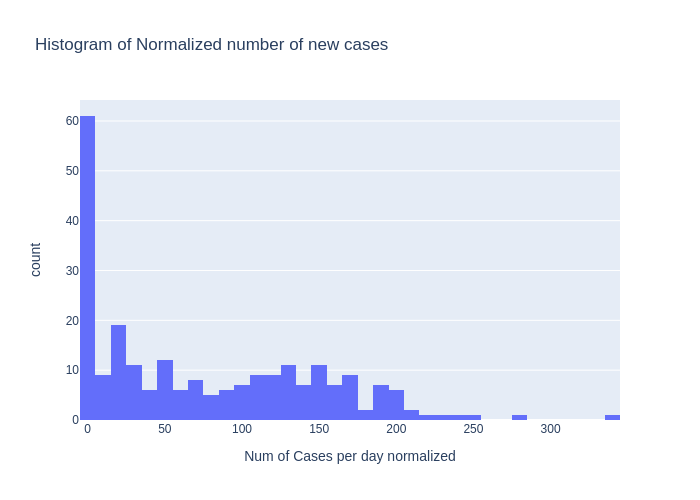

In [47]:
fig = px.histogram(NC_data_groupedBydate, x="Num of Cases per day normalized",nbins=40,title='Histogram of Normalized number of new cases ')
fig.write_image("../images/nc_histogram.png")
Image(filename="../images/nc_histogram.png")
#fig.show()

### Points to consider
The first step in recognizing what sort of distribution to fit our data to. A couple of observations:

- The data is positive-valued, since we are measuring number of covid-19 cases per day.

- The data is discrete

- The data gives the number of covid-19 cases observed in period/time interval of a day

- The probability of the occuarance of the cases each day is equiprobable. 

- The data is left skewed 
- It starts off high and has a long tail

We know that the Poisson distribution models the probability of seeing a certain number of successes within a time interval, here we are mesuring the number of covid-19 cases within a time interval of a day. Thus The Poisson distribution is a good fit

### We can observe that Poisson distribution is a good fit to the number of new cases in the state of NC

In [48]:
# Calculate the pmf values using the poission distribution and plot
fig = go.Figure()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Histogram(x=NC_data_groupedBydate["Num of Cases per day normalized"],nbinsx=40,name="NC Normalized Daily Cases Histogram"))
fig.add_trace(go.Scatter(x=NC_data_groupedBydate["Num of Cases per day normalized"], y=NC_data_groupedBydate["NC PMF"],mode='markers', name="Poisson Model"), secondary_y=True)
fig.write_image("../images/nc_histDistribution.png")
Image(filename="../images/nc_histDistribution.png")
#fig.show()

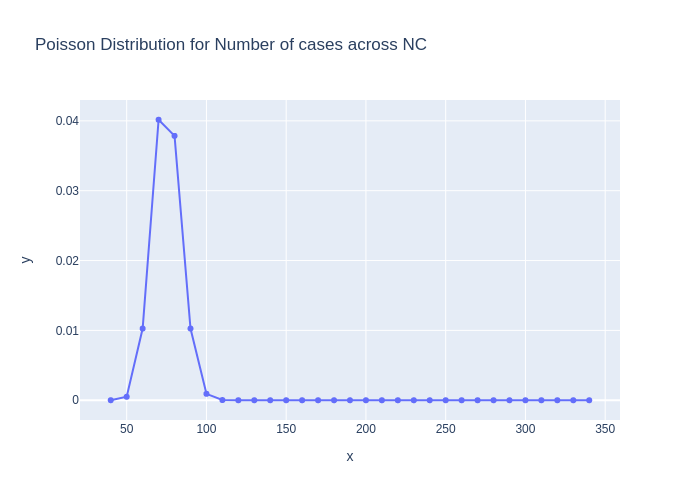

In [49]:
fig = px.scatter(NC_data_groupedBydate, x=range(40,350,10), y=stats.poisson.pmf(k=range(40,350,10),mu=75),title='Poisson Distribution for Number of cases across NC')
fig.update_traces(mode='lines+markers')
fig.write_image("../images/nc_Distribution.png")
Image(filename="../images/nc_Distribution.png")
#fig.show()

### Distribution Statistics

#### Measure of center

In [50]:
NC_data_groupedBydate['Num of Cases per day normalized'].mean()

75.52396557038008

#### Measure of spread

In [51]:
#variance
NC_data_groupedBydate['Num of Cases per day normalized'].var()

5252.865980896412

#### Skewness

In [52]:
NC_data_groupedBydate['Num of Cases per day normalized'].skew()

0.6997251548048288

#### Kurtosis

In [53]:
NC_data_groupedBydate['Num of Cases per day normalized'].kurt()

-0.2861513970272158

### Task 2 part 2: Fit Poisson Distribution for weekly data

In [54]:
NC_weekly_data.head()

Date  Num of Cases per day normalized  \
0 2020-01-26                              0.0   
1 2020-02-02                              0.0   
2 2020-02-09                              0.0   
3 2020-02-16                              0.0   
4 2020-02-23                              0.0   

   Num of Deaths per day normalized  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0

In [55]:
NC_weekly_data.mean().round(decimals=0)

Num of Cases per day normalized     75.0
Num of Deaths per day normalized     1.0
dtype: float64

## Poisson Distribution

**Function**
<div style="font-size: 150%;">  
$$f(x; \lambda)=\frac{e^{-\lambda}\lambda^x}{x!}$$
</div>

**Parameters**
* $X=\{0,1,2,\ldots\}$
* $\lambda > 0$, where $\lambda$ is both the mean and the variance of X. $$E(X) = \text{Var}(X) = \lambda$$
* $e$ = 2.71828 

### Process of modeling the Poisson distribution
- Let us take the time period for the finding the number of cases to be a week 
- We notice from the NC_weekly_data that the mean number of cases normalized for 1000000 people is 75 and mean number of deaths is 1
- We use the mean value of the number of cases and deaths as the value of lambda
- We use poisson.pmf to obtain the probability of the number of cases and deaths for different values of k 
- For finding the probability of number of cases we are using k = 40,50,60,70,80,90,100,110,120
- For finding the probaility of the number of deaths we are using k = 0,1,2,3,4

In [56]:
# pmf() to check the probability of obtaining a specific number of cases:
stats.poisson.pmf(k=40,     # Check the prob of getiing exactly 40 new cases 
                  mu=75)    # With average number of cases as 75

3.3015609924968333e-06

In [57]:
stats.poisson.pmf(k=50,     # Check the prob of getiing exactly 50 new cases 
                  mu=75)    # With average number of cases as 75

0.0004987721024975739

In [58]:
stats.poisson.pmf(k=60,     # Check the prob of getiing exactly 60 new cases 
                  mu=75)    # With average number of cases as 75

0.010266320338599085

In [59]:
stats.poisson.pmf(k=70,     # Check the prob of getiing exactly 60 new cases 
                  mu=75)    # With average number of cases as 75

0.040160328725542156

In [60]:
stats.poisson.pmf(k=80,     # Check the prob of getiing exactly 60 new cases 
                  mu=75)    # With average number of cases as 75

0.03785185834094226

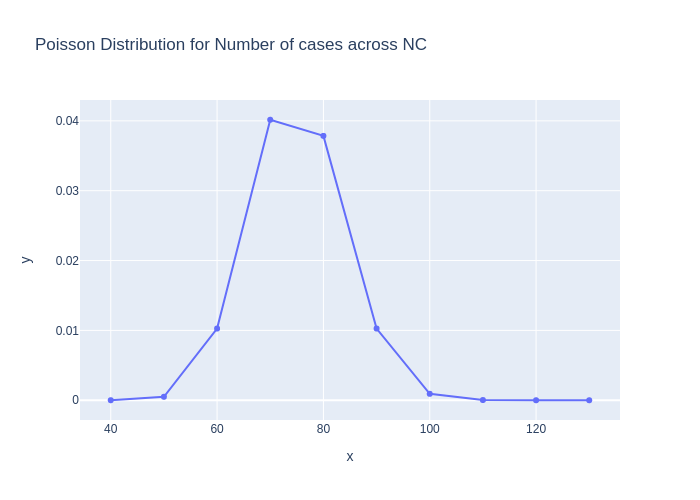

In [61]:
fig = px.scatter(NC_data_groupedBydate, x=range(40,140,10), y=stats.poisson.pmf(k=range(40,140,10),mu=75),title='Poisson Distribution for Number of cases across NC')
fig.update_traces(mode='lines+markers')
fig.write_image("../images/nc_Distribution.png")
Image(filename="../images/nc_Distribution.png")
#fig.show()

### Weekly data of 5 other states 

In [62]:
#Calculate the mean of the Num of Cases per day normalized
other_states_weekly_data_cases_stats=other_states_weekly_data.groupby('State')['Num of Cases per day normalized'].agg('mean').reset_index().round(decimals=0)
other_states_weekly_data_cases_stats

State  Num of Cases per day normalized
0    CA                             82.0
1    FL                            128.0
2    MD                             81.0
3    NC                             75.0
4    NY                             94.0
5    TX                             97.0

In [63]:
#Calculate the mean of the Num of Deaths per day normalized
other_states_weekly_data_Deaths_stats=other_states_weekly_data.groupby('State')['Num of Deaths per day normalized'].agg('mean').reset_index().round(decimals=0)
other_states_weekly_data_cases_stats

State  Num of Cases per day normalized
0    CA                             82.0
1    FL                            128.0
2    MD                             81.0
3    NC                             75.0
4    NY                             94.0
5    TX                             97.0

### Calculate the pmf values using poisson distribution

In [64]:
k_values = range(40,170,10)
states = other_states_weekly_data_cases_stats['State']
means = other_states_weekly_data_cases_stats['Num of Cases per day normalized']
columns = ['state','mean','k_value','probability']

data_dict={}
for column in columns:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['state'].append(states[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_cases=pd.DataFrame.from_dict(data_dict)
        

In [65]:
poisson_data_cases

state  mean  k_value   probability
0     CA  82.0       40  1.068468e-07
1     CA  82.0       50  3.939764e-05
2     CA  82.0       60  1.979287e-03
3     CA  82.0       70  1.889806e-02
4     CA  82.0       80  4.347434e-02
..   ...   ...      ...           ...
73    TX  97.0      120  2.888348e-03
74    TX  97.0      130  2.203269e-04
75    TX  97.0      140  7.804913e-06
76    TX  97.0      150  1.356132e-07
77    TX  97.0      160  1.211871e-09

[78 rows x 4 columns]

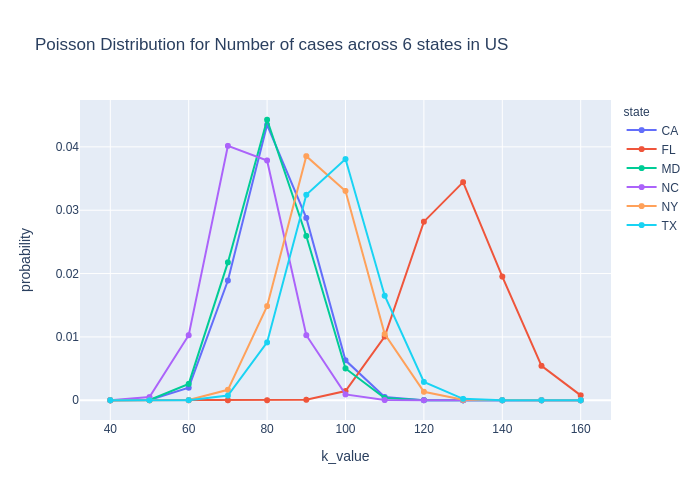

In [66]:
#plot the poisson distribution cases
fig = px.scatter(poisson_data_cases, x="k_value", y="probability", color='state',title='Poisson Distribution for Number of cases across 6 states in US')
fig.update_traces(mode='lines+markers')
fig.write_image("../images/nc_PoissonDistribution.png")
Image(filename="../images/nc_PoissonDistribution.png")
#fig.show()

### Poisson  Distribution for Number of Deaths across states

In [67]:
other_states_weekly_data_Deaths_stats

State  Num of Deaths per day normalized
0    CA                               2.0
1    FL                               2.0
2    MD                               3.0
3    NC                               1.0
4    NY                               7.0
5    TX                               2.0

### Calculate the pmf values using poisson distribution

In [68]:
k_values = range(12)
states = other_states_weekly_data_Deaths_stats['State']
means = other_states_weekly_data_Deaths_stats['Num of Deaths per day normalized']
columns = ['state','mean','k_value','probability']

data_dict={}
for column in columns:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['state'].append(states[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_deaths=pd.DataFrame.from_dict(data_dict)
poisson_data_deaths

state  mean  k_value  probability
0     CA   2.0        0     0.135335
1     CA   2.0        1     0.270671
2     CA   2.0        2     0.270671
3     CA   2.0        3     0.180447
4     CA   2.0        4     0.090224
..   ...   ...      ...          ...
67    TX   2.0        7     0.003437
68    TX   2.0        8     0.000859
69    TX   2.0        9     0.000191
70    TX   2.0       10     0.000038
71    TX   2.0       11     0.000007

[72 rows x 4 columns]

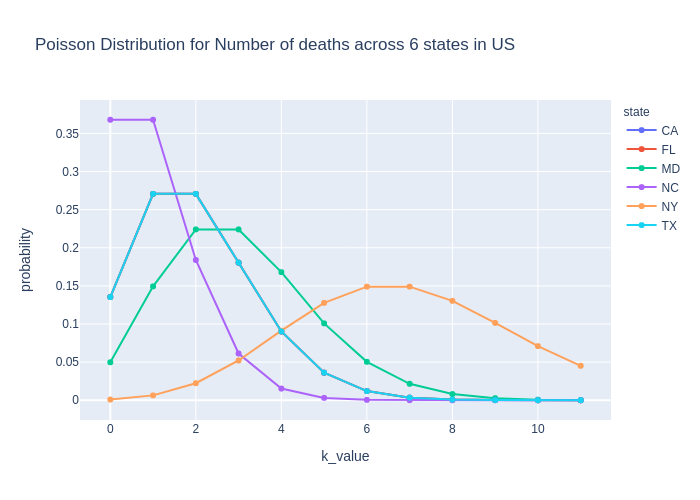

In [69]:
#plot the poisson distribution for deaths
fig = px.scatter(poisson_data_deaths, x="k_value", y="probability", color='state',title='Poisson Distribution for Number of deaths across 6 states in US')
fig.update_traces(mode='lines+markers')
fig.write_image("../images/nc_StatePoissonDistribution.png")
Image(filename="../images/nc_StatePoissonDistribution.png")
#fig.show()

### Task 2 member task 3:  Model poission distributions for North Carolina counties

In [70]:
#Select the top 5 counties with highest number of cases
top5_county_data

State  countyFIPS     County Name       Date  Num of Cases  \
463573    NC       37061   duplin county 2020-01-23             0   
463574    NC       37061   duplin county 2020-01-24             0   
463575    NC       37061   duplin county 2020-01-25             0   
463576    NC       37061   duplin county 2020-01-26             0   
463577    NC       37061   duplin county 2020-01-27             0   
...      ...         ...             ...        ...           ...   
477550    NC       37177  tyrrell county 2020-09-10           108   
477551    NC       37177  tyrrell county 2020-09-11           108   
477552    NC       37177  tyrrell county 2020-09-12           110   
477553    NC       37177  tyrrell county 2020-09-13           110   
477554    NC       37177  tyrrell county 2020-09-14           110   

        Num of Deaths  population  Num of Cases per day  Num of Death per day  \
463573              0       58741                   0.0                   0.0   
463574              0       58741                   0.0                   0.0   
463575              0       58741                   0.0                   0.0   
463576              0       58741                   0.0                   0.0   
463577              0       58741                   0.0                   0.0   
...               ...         ...                   ...                   ...   
477550              2        4016                   0.0                   0.0   
477551              2        4016                   0.0                   0.0   
477552              2        4016                   2.0                   0.0   
477553              2        4016                   0.0                   0.0   
477554              2        4016                   0.0                   0.0   

        Normalized num of cases  Normalized num of deaths  \
463573                 0.000000                       0.0   
463574                 0.000000                       0.0   
463575                 0.000000                       0.0   
463576                 0.000000                       0.0   
463577                 0.000000                       0.0   
...                         ...                       ...   
477550                 0.000000                       0.0   
477551                 0.000000                       0.0   
477552                 0.498008                       0.0   
477553                 0.000000                       0.0   
477554                 0.000000                       0.0   

        Log normalized num of cases  Log normalized num of deaths  
463573                         -inf                          -inf  
463574                         -inf                          -inf  
463575                         -inf                          -inf  
463576                         -inf                          -inf  
463577                         -inf                          -inf  
...                             ...                           ...  
477550                         -inf                          -inf  
477551                         -inf                          -inf  
477552                    -0.697139                          -inf  
477553                         -inf                          -inf  
477554                         -inf                          -inf  

[1180 rows x 13 columns]

In [71]:
#Calculate mean of th number of cases
top5_county_data_cases_stats= top5_county_data.groupby('County Name')['Num of Cases per day'].agg('mean').reset_index().round(decimals=0)
top5_county_data_cases_stats

County Name  Num of Cases per day
0      duplin county                   9.0
1  montgomery county                   4.0
2     robeson county                  17.0
3      stanly county                   7.0
4     tyrrell county                   0.0

In [72]:
# Calculate pmf 
k_values = range(0,20)
counties = top5_county_data_cases_stats['County Name']
means = top5_county_data_cases_stats['Num of Cases per day']
columns = ['County Name','mean','k_value','probability']

data_dict={}
for column in columns:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['County Name'].append(counties[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_county_cases=pd.DataFrame.from_dict(data_dict)

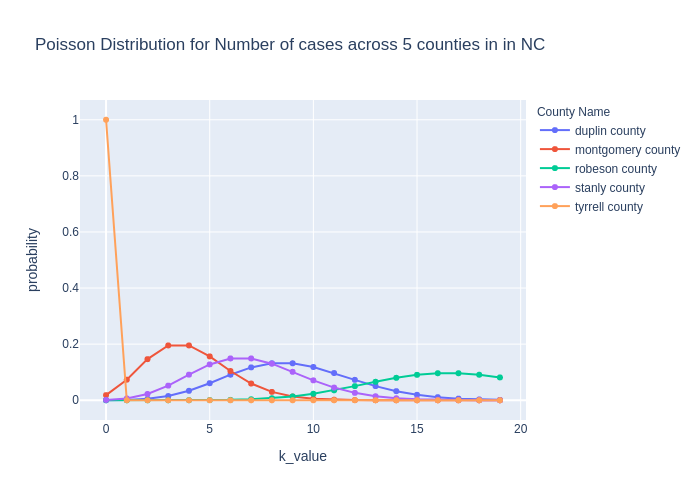

In [73]:
# Plot the poisson Distribution for cases
fig = px.scatter(poisson_data_county_cases, x="k_value", y="probability", color='County Name',title='Poisson Distribution for Number of cases across 5 counties in in NC')
fig.update_traces(mode='lines+markers')
fig.write_image("../images/nc_CountyCasesPoissonDistribution.png")
Image(filename="../images/nc_CountyCasesPoissonDistribution.png")
#fig.show()

In [74]:
#Calculate mean of th number of cases
top5_county_data_deaths_stats= top5_county_data.groupby('County Name')['Num of Death per day'].agg('mean').reset_index().round(decimals=0)
top5_county_data_deaths_stats

County Name  Num of Death per day
0      duplin county                   0.0
1  montgomery county                   0.0
2     robeson county                   0.0
3      stanly county                   0.0
4     tyrrell county                   0.0

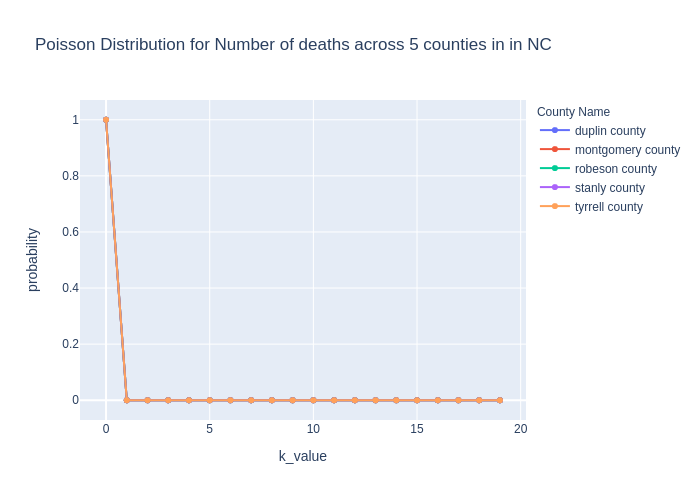

In [75]:
# Calculate pmf and plot
k_values = range(0,20)
counties = top5_county_data_deaths_stats['County Name']
means = top5_county_data_deaths_stats['Num of Death per day']
columns = ['County Name','mean','k_value','probability']

data_dict={}
for column in columns:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['County Name'].append(counties[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_county_deaths=pd.DataFrame.from_dict(data_dict)
fig = px.scatter(poisson_data_county_deaths, x="k_value", y="probability", color='County Name',title='Poisson Distribution for Number of deaths across 5 counties in in NC')
fig.update_traces(mode='lines+markers')
fig.write_image("../images/nc_CountyDeathsPoissonDistribution.png")
Image(filename="../images/nc_CountyDeathsPoissonDistribution.png")
#fig.show()

### Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.

In [76]:
# Read the merged demographic enrichment dataset
mergedEnrichmentData= pd.read_csv('../data/mergedeDemographicEnrichmentData.csv')
mergedEnrichmentData.head()

State  countyFIPS     County Name        Date  Num of Cases  Num of Deaths  \
0    AL        1003  baldwin county  2020-01-22             0              0   
1    AL        1003  baldwin county  2020-01-23             0              0   
2    AL        1003  baldwin county  2020-01-24             0              0   
3    AL        1003  baldwin county  2020-01-25             0              0   
4    AL        1003  baldwin county  2020-01-26             0              0   

   population  TotalMales  TotalFemales  sexRatioM/100F  ...  age75to84  \
0      223234      109192        114042            95.7  ...      14425   
1      223234      109192        114042            95.7  ...      14425   
2      223234      109192        114042            95.7  ...      14425   
3      223234      109192        114042            95.7  ...      14425   
4      223234      109192        114042            95.7  ...      14425   

   age85over  medianAge  65overMale  65overFemale  whitePopulation  \
0       4345       43.0       21573         26115           190912   
1       4345       43.0       21573         26115           190912   
2       4345       43.0       21573         26115           190912   
3       4345       43.0       21573         26115           190912   
4       4345       43.0       21573         26115           190912   

   blackPopulation  AmericanIndian&AlaskanNative  AsianPopulation  \
0            18338                          2428             2160   
1            18338                          2428             2160   
2            18338                          2428             2160   
3            18338                          2428             2160   
4            18338                          2428             2160   

   NativeHawiianOtherPacificPopulation  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  

[5 rows x 31 columns]

In [77]:
#Filter by the last available date 2020-09-14. This gives the total number of cases and deaths in that specific county
mergedEnrichmentData_lastDate = mergedEnrichmentData[mergedEnrichmentData['Date']=='2020-09-14']
mergedEnrichmentData_lastDate = mergedEnrichmentData_lastDate.replace({'whitePopulation' : { 'N' : 0},
                   'blackPopulation' : { 'N' : 0},
                   'AmericanIndian&AlaskanNative':{'N':0},
                    'AsianPopulation':{'N':0},
                    'NativeHawiianOtherPacificPopulation':{'N':0},})
for column in ['whitePopulation','blackPopulation','AmericanIndian&AlaskanNative','AsianPopulation','NativeHawiianOtherPacificPopulation']:
    mergedEnrichmentData_lastDate[column] = pd.to_numeric(mergedEnrichmentData_lastDate[column])

In [78]:
#Groupby state to get the statewise count of the total number of cases/deaths and other variables
mergedEnrichmentData_lastDate_groupedByState = mergedEnrichmentData_lastDate.groupby('State').sum().reset_index()

mergedEnrichmentData_lastDate_groupedByState.head()

State  countyFIPS  Num of Cases  Num of Deaths  population  TotalMales  \
0    AK        6280          5019             38      493166      254154   
1    AL       22689        101337           1548     3685364     1776665   
2    AR       55951         37448            471     1715114      835739   
3    AZ       40146        203414           5168     7108758     3534006   
4    CA      248565        760912          14400    39063663    19405647   

   TotalFemales  sexRatioM/100F    age<5  ageFrom5to9  ...  age75to84  \
0        239012           331.3    33712        36507  ...      15150   
1       1908699          1983.6   219446       218179  ...     187765   
2        879375          1043.8   107695       113683  ...      78786   
3       3574752          1011.9   417800       435304  ...     410893   
4      19658016          4070.4  2355250      2358466  ...    1694840   

   age85over  medianAge  65overMale  65overFemale  whitePopulation  \
0       3591      103.1       27643         29720           342224   
1      61253      828.9      268589        348388          2179960   
2      30644      412.6      115967        150039          1196986   
3     126842      407.5      582579        685603          5562574   
4     708190     1549.5     2551402       3182681         23109383   

   blackPopulation  AmericanIndian&AlaskanNative  AsianPopulation  \
0            20868                         43000            30830   
1           955414                         15259            59482   
2           225219                         11206            36729   
3           342052                        313345           240951   
4          2272260                        307398          5857776   

   NativeHawiianOtherPacificPopulation  
0                                 8484  
1                                 1087  
2                                 8965  
3                                14105  
4                               154820  

[5 rows x 29 columns]

In [79]:
# Calculate the correlation
corr = mergedEnrichmentData_lastDate_groupedByState.corr()

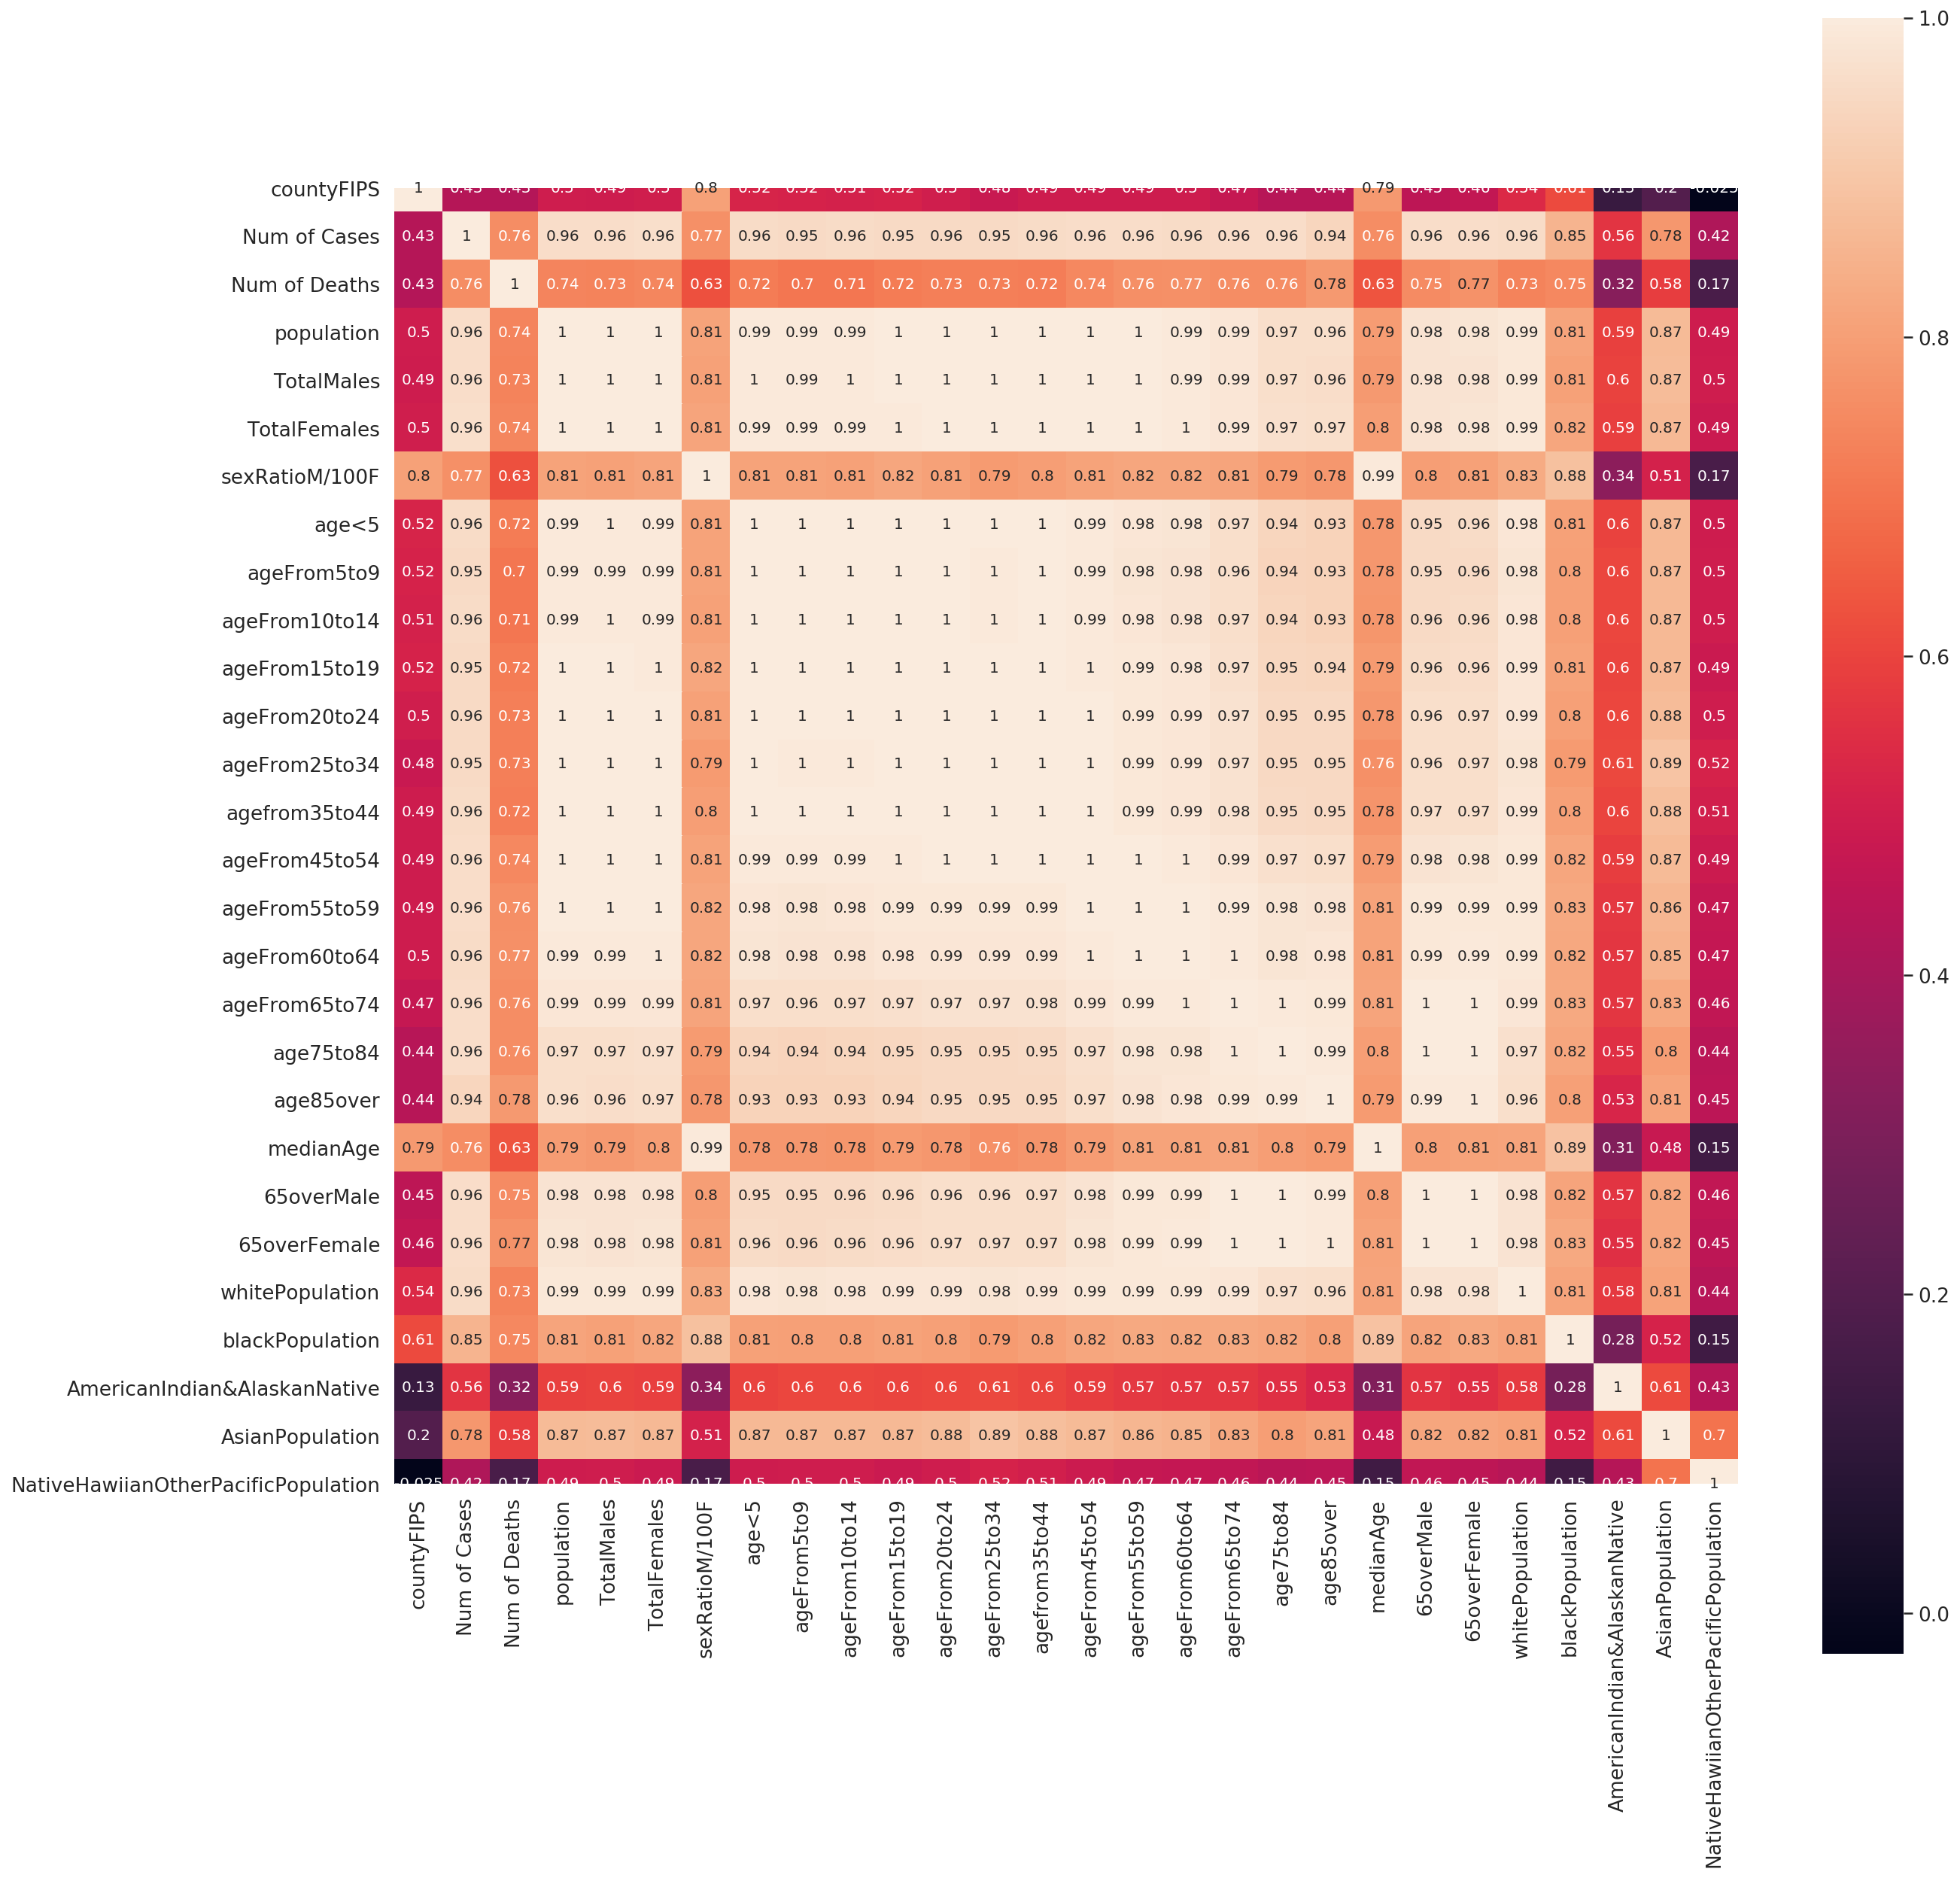

In [80]:
# Plot the correlation on a heat map
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, square=True)

### From the heat map we can observe that 
- There is a high correlation betweeen the number of cases with total population, sex and different age groups
- There is a week correlation betweeen the number of cases with races
- There is a week correlation betweeen the number of deaths with races

### Hypothesis
* Is being Male or Female a factor for higher covid cases
* Does belonging to a particular age group influence increase in covid cases
* Does belonging to a particular etnic group have a influence on the number of covid cases